# Supplementary Practice Problems

These are similar to programming problems you may encounter in the mid-terms. They are not graded but we will review them in lab sessions.

**1**. (10 points) The logistic map is defined by the following simple function

$$
f(x) = rx(1-x)
$$

For $x_0 = 0.1$ and $r = 4.0$, store the first 10 values of the iterated logistic map $x_{i+1} = rx_i(1-x_i)$ in a list. The first value in the list should be $x_0$.

In [1]:
def logistic(x, r):
    """Blah"""
    return r*x*(1-x)

In [2]:
import numpy as np

In [3]:
n = 10
xs = np.zeros(n)
xs[0] = 0.1
r = 4.0

for i in range(1, n):
    xs[i] = logistic(xs[i-1], r)
xs

array([ 0.1       ,  0.36      ,  0.9216    ,  0.28901376,  0.82193923,
        0.58542054,  0.97081333,  0.11333925,  0.40197385,  0.9615635 ])

**2**. (10 points) Write a function to find the greatest common divisor (GCD) of 2 numbers using Euclid's algorithm.:

\begin{align}
\gcd(a,0) &= a \\
\gcd(a, b) &= \gcd(b, a \mod b)
\end{align}

Find the GCD of 5797 and 190978. 

Now write a function to find the GCD given a collection of numbers.

Find the GCD of (24, 48, 60, 120, 8).

In [4]:
def gcd(a, b):
    """Blah"""
    if b == 0:
        return a
    else:
        return gcd(b, a % b)

In [5]:
gcd( 5797, 190978)

17

In [6]:
from functools import reduce

In [7]:
def gcds(xs):
    """Blah"""
    return reduce(lambda a, b: gcd(a, b), xs)

In [8]:
xs = (24, 48, 60, 120, 8)
gcds(xs)

4

**3**. (10 points) Find the least squares linear solution to the following data

```
y = [1,2,3,4]
x1 = [1,2,3,4]
x2 = [2,3,4,5]
```

That is, find the "best" intercept and slope for the variables `x1` and `x2`.

In [9]:
from scipy.linalg import lstsq

In [10]:
y = [1,2,3,4]
x1 = [1,2,3,4]
x2 = [2,3,4,5]

X = np.c_[np.ones(len(y)), x1, x2]
lstsq(X, y)

(array([-0.33333333,  0.66666667,  0.33333333]),
 array([], dtype=float64),
 2,
 array([  9.34413269e+00,   8.28965828e-01,   1.18039779e-16]))

**4**. (10 points) Read the `mtcars` data frame from R to a `pandas` DataFrame. Find the mean `wt` and `mpg` for all cars grouped by the number of `gear`s.

In [11]:
%load_ext rpy2.ipython

In [12]:
mtcars = %R mtcars

In [13]:
mtcars.groupby('gear')[['wt', 'mpg']].mean()

,wt,mpg
gear,,
3.0,3.892600,16.106667
4.0,2.616667,24.533333
5.0,2.632600,21.380000


**5**. (10 points) Read the `iris` data frame from R to a `pandas` DataFrame. Make a `seaborn` plot showing a linear regression of `Petal.Length` (y) against `Sepal.Length` (x). Make a separate regression line for each `Species`.

In [14]:
iris = %R iris

In [15]:
%matplotlib inline

In [16]:
import seaborn as sns

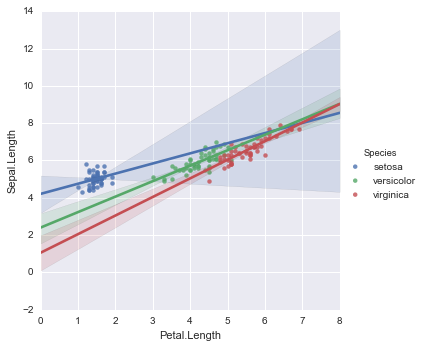

In [17]:
sns.lmplot(x='Petal.Length', y='Sepal.Length', hue='Species', data=iris)
pass

**6**. (10 points) Write a function that can flatten a nested list of arbitrary depth. Check that

```python
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])
```

returns

```python
[1,2,3,4,5,6,7,8,9,10,11,12]
```

For simplicity, assume that the only data structure you will encounter is a list. You can check if an item is a list by using 

```python
isinstance(item, list)
```

In [18]:
def flatten(xs, acc=[]):
    """Blah"""
    if not isinstance(xs, list):
        acc.append(xs)
    else:
        for x in xs:
            flatten(x)
    return acc

In [19]:
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

**7**. (10 points) Create the following table

```python
array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])
```

Start with the first row

```
[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
```

and build the subsequent rows using a simple rule that only depends on the previous row.

In [20]:
xs = []

r = [ 0, 1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
for i in range(10):
    s = [0]
    for x, y in zip(r[:], r[1:]):
        s.append(x + y)
    xs.append(s[1:])
    r = s

In [21]:
np.array(xs)

array([[  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])

**8**. (10 points) Read the following data sets into DataFrames. 

- url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
- url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"

Create a new DataFraem only containing the names present in both DataFrames. Drop the `timef` column and have a single column for `dist` , `climb` and `time` that shows the average value of the two DataFrames. The final DtataFrame will thus have 4 columns (name, dist, climb, time).

In [22]:
import pandas as pd

In [23]:
url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"

In [24]:
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [25]:
df1.head(3)

,Unnamed: 0,dist,climb,time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,Craig Dunain,6.0,900,33.650


In [26]:
df2.head(3)

,Unnamed: 0,dist,climb,time,timef
0,Tiso Carnethy,6.0,2500,0.782222,0.919167
1,Criffel,7.0,1800,0.793333,1.003333
2,Chapelgill,1.5,1400,0.314444,0.376667


In [27]:
df = pd.merge(df1, df2, on='Unnamed: 0')

In [28]:
df.head(3)

,Unnamed: 0,dist_x,climb_x,time_x,dist_y,climb_y,time_y,timef
0,Craig Dunain,6.0,900,33.650,6.0,900,0.546111,0.625833
1,Ben Lomond,8.0,3070,62.267,9.0,3192,1.037778,1.199167
2,Goatfell,8.0,2866,73.217,8.0,2866,1.227778,1.526389


In [29]:
df = df.drop('timef', axis=1)
df.head(3)

,Unnamed: 0,dist_x,climb_x,time_x,dist_y,climb_y,time_y
0,Craig Dunain,6.0,900,33.650,6.0,900,0.546111
1,Ben Lomond,8.0,3070,62.267,9.0,3192,1.037778
2,Goatfell,8.0,2866,73.217,8.0,2866,1.227778


In [30]:
df.dtypes

Unnamed: 0     object
dist_x        float64
climb_x         int64
time_x        float64
dist_y        float64
climb_y         int64
time_y        float64
dtype: object

In [31]:
df['dist'] = df.loc[:, ['dist_x', 'dist_y']].mean(skipna=True, axis=1)
df['climb'] = df.loc[:, ['climb_x', 'climb_y']].mean(skipna=True, axis=1)
df['time'] = df.loc[:, ['time_x', 'time_y']].mean(skipna=True, axis=1)
df = df.drop(['dist_x', 'dist_y', 'climb_x', 'climb_y', 'time_x', 'time_y'], axis=1)
df.columns = ['name', 'dist', 'climb', 'time']

In [32]:
df.head(3)

,name,dist,climb,time
0,Craig Dunain,6.0,900.0,17.098056
1,Ben Lomond,8.5,3131.0,31.652389
2,Goatfell,8.0,2866.0,37.222389
